<h4>ChatGPT vs Bing Product Overlap</h4>
<p>
This notebook presents a comparative analysis of product overlap between ChatGPT and Bing.
The objective is to quantify the extent to which both systems recommend overlapping products when responding to the same queries.
</p>

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df, get_bing_df
from metrics import semantic_overlap
from plots import boxplot
from utility import top_n_semantic_products

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,sources_all,domains_cited,domains_additional,domains_all,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, forbes.com], [tomsguide.com],...","[[reddit.com, tomsguide.com, techrepublic.com,...","[[tomsguide.com, forbes.com, reddit.com, techr...","[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, phonearena.com, wired.com], [...","[[reddit.com, theverge.com, techadvisor.com, w...","[[tomsguide.com, phonearena.com, wired.com, re...","[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,[[https://www.techradar.com/news/best-cameraph...,"[[tomsguide.com, techradar.com], [abdgadgets.c...","[[reddit.com, tomsguide.com, stuff.tv, techadv...","[[tomsguide.com, techradar.com, reddit.com, st...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,[[https://www.androidcentral.com/phones/oneplu...,"[[androidcentral.com, tomsguide.com, phonearen...","[[tomsguide.com, wired.com, co.uk, 9to5google....","[[androidcentral.com, tomsguide.com, phonearen...","[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,[[https://www.pcworld.com/article/436674/best-...,"[[windowscentral.com, rtings.com, pcworld.com,...","[[reddit.com, bestbuy.com, windowscentral.com,...","[[windowscentral.com, rtings.com, pcworld.com,...","[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, wired.com], [tomshardware....","[[reddit.com, tomshardware.com, pcworld.com, y...","[[tomshardware.com, wired.com, reddit.com, pcw...","[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, techradar.com], [tomshardw...","[[reddit.com, tomsguide.com, tomshardware.com,...","[[tomshardware.com, techradar.com, reddit.com,...","[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.ultrabookreview.com/2071-best-

<h4>Dataset: Bing</h4>

In [3]:
bing_df = get_bing_df()
bing_df

,query,product,market_type,query_level,content,url,domain,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[The Best Phones We've Tested for 2025 | PCMag...,"[https://www.pcmag.com/picks/the-best-phones, ...","[pcmag.com, tomsguide.com, techradar.com, zdne...","[[Apple iPhone 17, Samsung Galaxy S25 Ultra, S..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,[Top Smartphones Under $1000 About UsTrendingR...,[https://www.analyticsinsight.net/gadgets/best...,"[analyticsinsight.net, techwiser.com, techspec...","[[Samsung Galaxy S25, iPhone 16 Pro, Google Pi..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,[9 Best Camera Phones Under $1000 for Amazing ...,[https://www.techwisehub.com/blog/best-camera-...,"[techwisehub.com, techwiser.com, amateurphotog...","[[Samsung Galaxy S25, iPhone 16, Google Pixel ..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[Best Phones Under $1000 (August 2025) - TechW...,[https://techwiser.com/best-phones-under-1000-...,"[techwiser.com, pcmag.com, techspecs.info, ana...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Plus..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[The Best Laptops We've Tested (September 2025...,"[https://www.pcmag.com/picks/the-best-laptops,...","[pcmag.com, nytimes.com, tomsguide.com, zdnet....","[[Dell 14 Plus (DB14250), Dell Precision 5690,..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[10 Best Laptops 2025 Under $1500: Complete Gu...,[https://gadgetsandall.com/10-best-laptops-202...,"[gadgetsandall.com, gizmodo.com, dockuniverse....","[[Apple MacBook Air 13″ (M4), ASUS ROG Strix G..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, dockuniverse.com...",[[MSI Titan 18 HX Gaming Laptop (A14VIG-036US)...
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, gizmodo.com, ofz...","[[MSI Titan 18 HX, ASUS Zenbook 14, MSI Titan ..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[The Best Smartwatches We've Tested for 2025 |...,[https://www.pcmag.com/picks/the-best-smartwat...,"[pcmag.com, forbes.com, tomsguide.com, techrad...","[[Apple Watch Series 11, Samsung Galaxy Watch ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[Best budget smartwatches: 6 cheap but good op...,[https://www.wareable.com/smartwatches/best-ch...,"[wareable.com, tomsguide.com, pcmag.com, techr...","[[Amazfit Active 2, Huawei Watch Fit 3, Xiaomi..."


<h4>Cross-System Mean Product Overlap (CSMPO) - Definition & Implementation</h4>
<p>To quantify how similar ChatGPT’s and Bing’s product recommendations are for the same query, we define a metric called the Cross-System Mean Product Overlap (CSMPO). This metric lets us measure, on average, how much ChatGPT’s product lists overlap with those extracted from Bing’s search results.</p>
<ul>
  <li>ChatGPT: $ G_q = [g_{q1}, g_{q2}, g_{q3}] $, where each $ g_{qi} $ is the list of products recommended by ChatGPT in run $ i $ for query $ q $.</li>
  <li>Bing: $ B_q = [b_{q1}, \ldots, b_{q10}] $, where each $ b_{qi} $ is a product list extracted from each individual Bing organic search result $ i $ for query $ q $.</li>
</ul>
<p>Formally, the Cross-System Mean Product Overlap for query $ q $ is</p>
<p>
$$
\mathrm{CSMPO}(q) = \frac{1}{|G_q||B_q|} \sum_{i=1}^{|G_q|}\sum_{j=1}^{|B_q|} O_{\text{semantic}}(g_{qi}, b_{qj})
$$
</p>
<p>Here, $ O_{\text{semantic}}(g_{qi}, b_{qj}) $ denotes the semantic overlap between the ChatGPT product list $ g_{qi} $ and the Bing product list $ b_{qj} $. Higher $ \mathrm{CSMPO}(q) $ indicates greater alignment in recommended products across systems for the same query.</p>

In [4]:
def calc_csmpo(chatgpt_df, bing_df):
    results = []
    
    for _, row in tqdm(chatgpt_df.iterrows(), total = len(chatgpt_df), desc = "Calculating CSMPO"):
        query = row["query"]
        g_lists = row["recommended_products"]
        b_lists = bing_df[bing_df["query"] == query]["recommended_products"].iloc[0]

        pairwise_scores = [semantic_overlap(g, b) for g in g_lists for b in b_lists]

        semantic_mean = np.mean(pairwise_scores)
        semantic_var = np.var(pairwise_scores, ddof = 0)
        semantic_std = np.sqrt(semantic_var)

        results.append({
            "query": query,
            "product": row.get("product"),
            "market_type": row.get("market_type"),
            "query_level": row.get("query_level"),
            "csmpo_mean": semantic_mean,
            "csmpo_var": semantic_var,
            "csmpo_std": semantic_std
        })
    
    return pd.DataFrame(results)

In [5]:
csmpo_df = calc_csmpo(chatgpt_df, bing_df)
csmpo_df

Calculating CSMPO:   0%|          | 0/48 [00:00<?, ?it/s]

,query,product,market_type,query_level,csmpo_mean,csmpo_var,csmpo_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.631322,0.055740,0.236092
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.586270,0.064114,0.253207
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.516540,0.083094,0.288260
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.404563,0.057987,0.240805
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.236019,0.013263,0.115166
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.063828,0.007683,0.087651
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.055556,0.008025,0.089581
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.080556,0.011103,0.105373
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.536111,0.014964,0.122327
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.091852,0.033470,0.182948


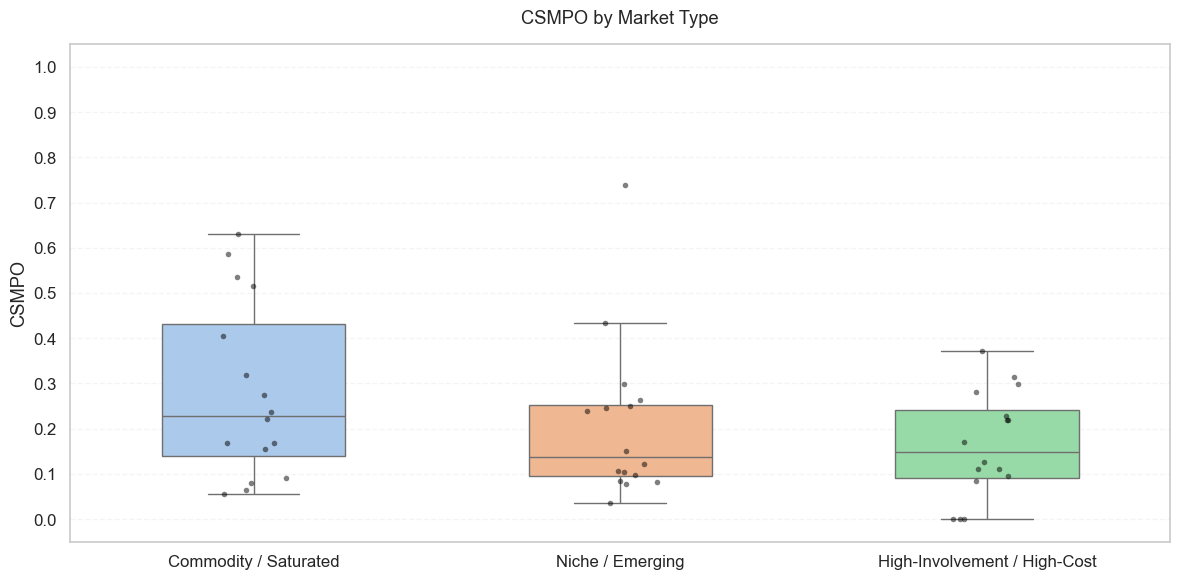

In [6]:
csmpo_cs = csmpo_df[csmpo_df["market_type"] == "Commodity / Saturated"]
csmpo_ne = csmpo_df[csmpo_df["market_type"] == "Niche / Emerging"]
csmpo_hh = csmpo_df[csmpo_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "CSMPO": pd.concat([
        csmpo_cs["csmpo_mean"],
        csmpo_ne["csmpo_mean"],
        csmpo_hh["csmpo_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmpo_cs)
        + ["Niche / Emerging"] * len(csmpo_ne)
        + ["High-Involvement / High-Cost"] * len(csmpo_hh)
    )
})

boxplot(
    df = plot_df,
    x_col = "Market Type",
    y_col = "CSMPO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "CSMPO by Market Type",
    xlabel = "",
    ylabel = "CSMPO"
)

<h4>CSMPO by Market Type</h4> 

<p>The boxplots show that product overlap between ChatGPT and Bing is highest and most variable in Commodity/Saturated markets, typically lower in Niche/Emerging (with rare high outliers), and low–moderate in High-Involvement/High-Cost with a tighter upper range.</p>

<ul> 
    <li>Commodity markets share strong intent match and authority consensus (many listicles/reviews on the same popular items), so both systems converge more and vary more as SERP competition and freshness cycles shift.</li>
    <li>Niche/Emerging has thinner authority signals and fragmented terminology. Bing surfaces diverse long-tail pages while ChatGPT’s extraction/deduplication can pick different items, lowering typical overlap.</li>
    <li>High-Involvement queries mix research guides, brand sites, and retailers. Broader consideration sets and price/version granularity reduce exact product matches across systems.</li> 
</ul> 

<p>Overall, market structure and SERP diversity shape how many identical products both systems select. Consensus-heavy spaces align more, fragmented spaces diverge.</p>

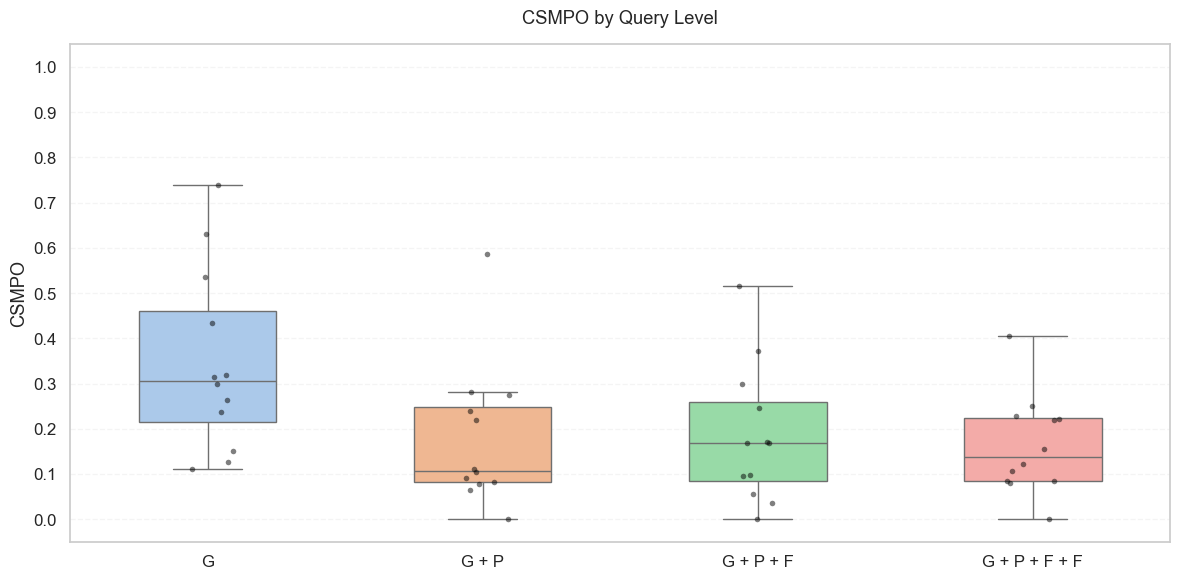

In [7]:
csmpo_g = csmpo_df[csmpo_df["query_level"] == "General"]
csmpo_gp = csmpo_df[csmpo_df["query_level"] == "General & Price"]
csmpo_gpf = csmpo_df[csmpo_df["query_level"] == "General & Price & Feature"]
csmpo_gpff = csmpo_df[csmpo_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "CSMPO": pd.concat([
        csmpo_g["csmpo_mean"],
        csmpo_gp["csmpo_mean"],
        csmpo_gpf["csmpo_mean"],
        csmpo_gpff["csmpo_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(csmpo_g)
        + ["G + P"] * len(csmpo_gp)
        + ["G + P + F"] * len(csmpo_gpf)
        + ["G + P + F + F"] * len(csmpo_gpff)
    )
})

boxplot(
    df = plot_df,
    x_col = "Query Level",
    y_col = "CSMPO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "CSMPO by Query Level",
    xlabel = "",
    ylabel = "CSMPO"
)

<h4>CSMPO by Query Level (G → G+P → G+P+F → G+P+F+F)</h4> 

<p>Overlap is highest and most variable for Generic (G) queries, drops when Price constraints are added (G+P), rebounds modestly with Features (G+P+F), and stays relatively low with added Fit/Usage constraints (G+P+F+F).</p> 

<ul> 
    <li>Generic intents map to broad, high-authority “best of” lists. Both systems pull from similar sources and pick many of the same popular products.</li> 
    <li>Adding price narrows candidate sets differently (SERP filters vs LLM constraint satisfaction), so the two systems settle on different SKUs around thresholds, reducing overlap.</li> 
    <li>Feature and fit constraints shift ranking to vertical intent and spec matching. ChatGPT’s extraction and deduping and Bing’s retailer/aggregator coverage emphasize different trade-offs, keeping overlap below the Generic baseline.</li> 
</ul> 

<p>As constraints increase, mechanism differences (SERP filtering vs generative selection) matter more than shared authority signals, so exact product matches decline.</p>

<br />

<h4>Cross-System Overall Product Overlap (CSOPO) — Definition & Implementation</h4>
<p>CSOPO measures how closely ChatGPT and Bing align on the <em>core</em> recommended products for a query. It compresses each system’s multiple product lists into one representative, semantically aggregated “top list,” then evaluates their overall semantic similarity.</p> <ul> <li>ChatGPT lists: $ G_q = [g_{q1}, \ldots, g_{qM}] $</li> <li>Bing lists: $ B_q = [b_{q1}, \ldots, b_{qN}] $</li> <li>Aggregated via <code>top_n_semantic_products</code>: $ \tilde{G}_q = \text{TopN}(G_q), \; \tilde{B}_q = \text{TopN}(B_q) $</li> </ul> <p>$$ \mathrm{CSOPO}(q) = O_{\text{semantic}}(\tilde{G}_q, \tilde{B}_q) $$</p> <p>where $ O_{\text{semantic}}(\cdot,\cdot) $ denotes semantic overlap between the aggregated top lists.</p> 

In [8]:
def calc_csopo(chatgpt_df, bing_df):
    results = []
    
    for _, row in tqdm(chatgpt_df.iterrows(), total = len(chatgpt_df), desc = "Calculating CSMPO"):
        query = row["query"]
        g_lists = row["recommended_products"]
        b_lists = bing_df[bing_df["query"] == query]["recommended_products"].iloc[0]

        g_products = top_n_semantic_products(g_lists)
        b_products = top_n_semantic_products(b_lists)

        results.append({
            "query": query,
            "product": row.get("product"),
            "market_type": row.get("market_type"),
            "query_level": row.get("query_level"),
            "csopo": semantic_overlap(g_products, b_products)
        })

    return pd.DataFrame(results)

In [9]:
csopo_df = calc_csopo(chatgpt_df, bing_df)
csopo_df

Calculating CSMPO:   0%|          | 0/48 [00:00<?, ?it/s]

,query,product,market_type,query_level,csopo
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.600000
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.750000
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.444444
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.571429
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.100000
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.300000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.100000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.000000
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.400000
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.200000


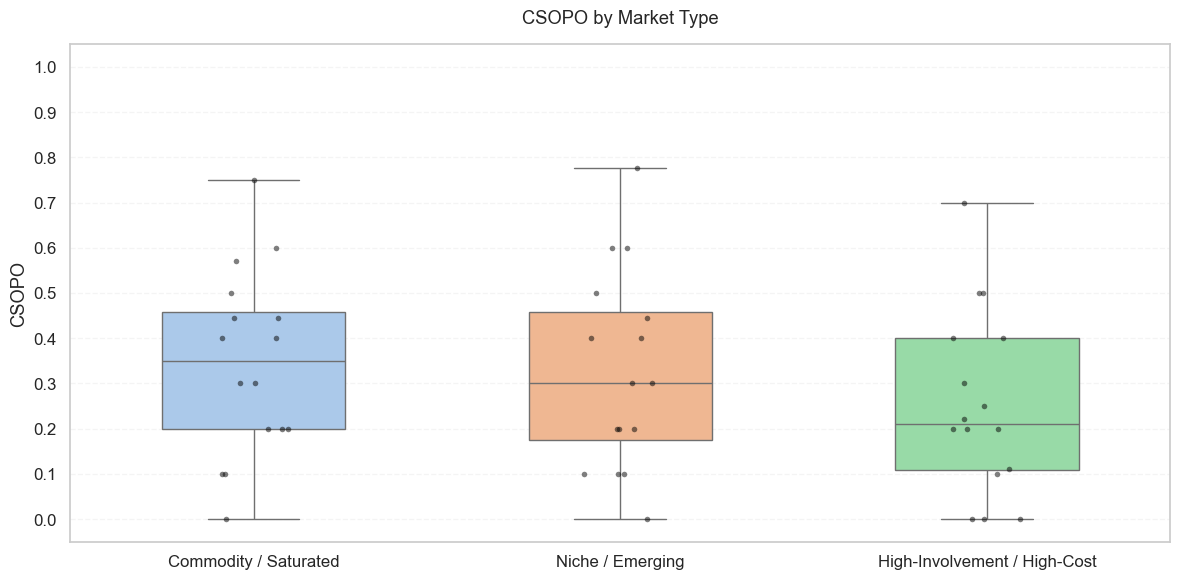

In [10]:
csopo_cs = csopo_df[csopo_df["market_type"] == "Commodity / Saturated"]
csopo_ne = csopo_df[csopo_df["market_type"] == "Niche / Emerging"]
csopo_hh = csopo_df[csopo_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "CSOPO": pd.concat([
        csopo_cs["csopo"],
        csopo_ne["csopo"],
        csopo_hh["csopo"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csopo_cs)
        + ["Niche / Emerging"] * len(csopo_ne)
        + ["High-Involvement / High-Cost"] * len(csopo_hh)
    )
})

boxplot(
    df = plot_df,
    x_col = "Market Type",
    y_col = "CSOPO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "CSOPO by Market Type",
    xlabel = "",
    ylabel = "CSOPO"
)

<h4>CSOPO by Market Type</h4> 

<p>The boxplots show moderate overall product overlap in Commodity/Saturated and Niche/Emerging markets (medians around the low–mid 0.3s) with wide variability, while High-Involvement/High-Cost has a lower median and more near-zero cases.</p> 

<ul> 
    <li>Commodity and Niche markets share some consensus products but also many alternatives. Strong authority signals compete with SERP diversity, producing wide spread.</li> 
    <li>High-Involvement queries include more model/trim/version granularity and multi-page research flows. Exact product matches fall as intent fragments across retailers, brand sites, and reviews.</li> 
    <li>Generative selection vs retrieval ranking accentuates differences: ChatGPT’s deduping/extraction choices and Bing’s authority/freshness weighting align on a core set but diverge on edges.</li> 
</ul> 

<p>Overall, market structure and SERP competition govern CSOPO: consensus-heavy spaces align more on “top lists,” while high-involvement decisions dilute overlap.</p>

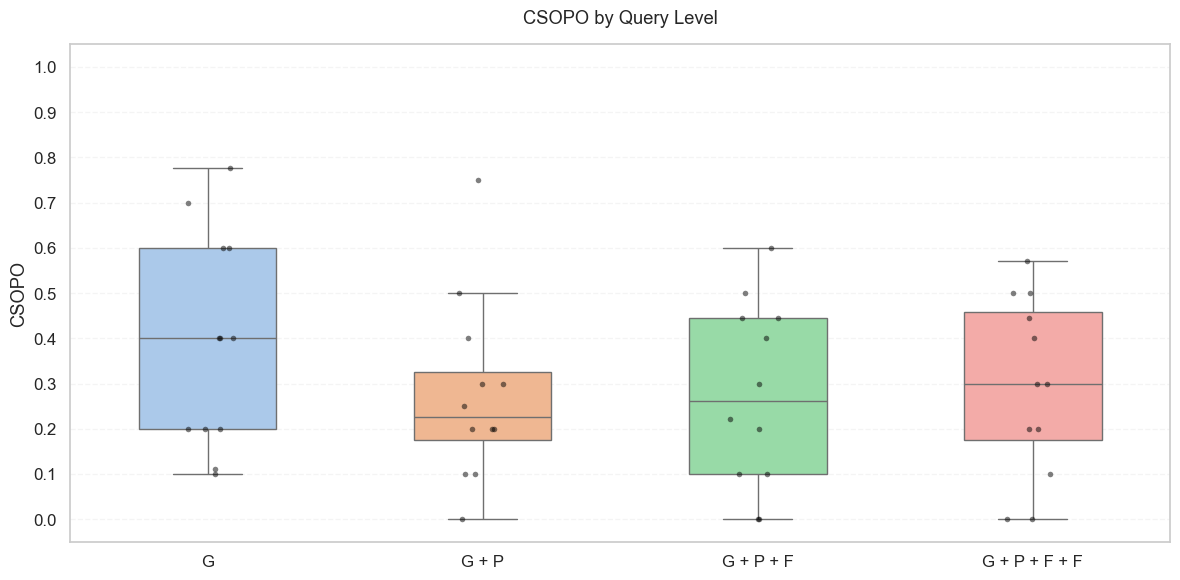

In [11]:
csopo_g = csopo_df[csopo_df["query_level"] == "General"]
csopo_gp = csopo_df[csopo_df["query_level"] == "General & Price"]
csopo_gpf = csopo_df[csopo_df["query_level"] == "General & Price & Feature"]
csopo_gpff = csopo_df[csopo_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "CSOPO": pd.concat([
        csopo_g["csopo"],
        csopo_gp["csopo"],
        csopo_gpf["csopo"],
        csopo_gpff["csopo"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(csopo_g)
        + ["G + P"] * len(csopo_gp)
        + ["G + P + F"] * len(csopo_gpf)
        + ["G + P + F + F"] * len(csopo_gpff)
    )
})

boxplot(
    df = plot_df,
    x_col = "Query Level",
    y_col = "CSOPO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "CSOPO by Query Level",
    xlabel = "",
    ylabel = "CSOPO"
)

<h4>CSOPO by Query Level (G → G+P → G+P+F → G+P+F+F)</h4>

<p>Overlap is highest for Generic (G), drops with Price constraints (G+P), then partially rebounds as Features and Fit are added (G+P+F, G+P+F+F) but remains below the Generic baseline; variance is sizeable at all levels.</p>

<ul> 
    <li>G queries map to broad, high-authority roundup pages. Both systems surface similar sources and converge on popular products.</li> 
    <li>Adding Price narrows candidate sets differently (search filters and retailer coverage vs LLM constraint satisfaction), splitting final picks around thresholds.</li> 
    <li>Feature/Fit constraints increase vertical intent and spec matching; ChatGPT’s extraction sensitivity and source coverage vs Bing’s ranking balance produce partial recovery, not full parity with G.</li> 
</ul> 

<p>As constraints grow, mechanism differences (retrieval ranking vs generative list construction) drive lower exact agreement in the aggregated “top lists". </p>